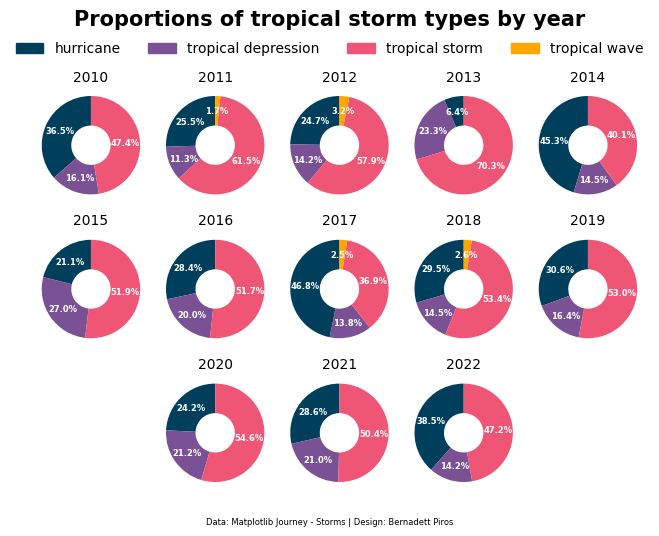

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv"
df_storms = pd.read_csv(url)

colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']

grouped = df_storms.groupby(['year', 'status'])['n'].sum().reset_index()

# Get unique years for plotting
years = grouped['year'].unique()

# Define colors for the categories
category_colors = {'hurricane': '#003f5c', 'tropical depression': '#7a5195', 'tropical storm': '#ef5675', 'tropical wave': '#ffa600'}   

fig, axs = plt.subplots(3, 5, figsize=(8, 5))
plt.subplots_adjust(wspace=0.01, hspace=0.01, bottom=0.02)

skip_indices = [10, 14]

year_idx = 0  
for i, ax in enumerate(axs.flat):
    if i in skip_indices:
        ax.axis("off")  
        continue
   
    year = years[year_idx]
    year_idx += 1

    year_data = grouped[grouped["year"] == year]
    categories = year_data["status"]
    values = year_data["n"]  
    
    wedges, texts, autotexts = ax.pie(
        values,
        labels=None,
        colors=colors,
        autopct="%1.1f%%",
        pctdistance=0.7,
        startangle=90,
        wedgeprops={"width": 0.6},  
        textprops={"fontsize":6, "weight":"bold"}
    )

    for wedge, label, value, autotext in zip(wedges, categories, values, autotexts):
        if value == 0:
            autotext.set_text("")  
        else:
            autotext.set_color("white")  

    ax.set_title(f"{year}", fontsize=10, pad=1)

from matplotlib.patches import Patch
legend_labels = [Patch(color=color, label=category) for category, color in category_colors.items()]
fig.legend(handles=legend_labels, loc="upper center", bbox_to_anchor=(0.5, 0.97), ncol=4, frameon=False)

fig.text(0.5, 0.99, "Proportions of tropical storm types by year", va="center", ha="center", fontsize=15, weight="bold")

fig.text(0.5, -0.02, "Data: Matplotlib Journey - Storms | Design: Bernadett Piros",
         size=6, ha="center")

plt.show()   

#plt.savefig("donut_small_multiples_storm", dpi=300, bbox_inches='tight', pad_inches=0.2)